### Regression Algorithm Machine Learning - House Sales in King County USA

When it comes to sell you properties (houses), several factors might come as consideration points.
In this case, we want to figure out how prices are impacted by many features, i.e. Floors, grade, amount of bath- & bedrooms, etc.


### Problem Statement
Confirming the prices, House features should be further investigated. Picking the right price range when searching for a new house is really necessecary because if you don't, you could miss out on finding the right home. You also don't want to waste time looking at homes that don't fit your criteria because they cost more than you want to pay.


### Goals
Finaly, we want to analize these factors, in order to label the prices.This observation will compare the values of homes in King County and what are the factors that impacting price of a house in King County to predict market price prediction with help of machine learning modeling. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

df =pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# DATA EXPLORATION

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dataset is quiet good and looks clean, No Missing Values detected

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.describe(include='O')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [6]:
HouseSalesDesc=[]

for i in df.columns:
    HouseSalesDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=HouseSalesDesc,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[2856101105, 921059161]"
1,date,object,0,0.0,372,"[20140526T000000, 20140721T000000]"
2,price,float64,0,0.0,4028,"[401750.0, 557510.0]"
3,bedrooms,int64,0,0.0,13,"[9, 2]"
4,bathrooms,float64,0,0.0,30,"[1.25, 8.0]"
5,sqft_living,int64,0,0.0,1038,"[982, 4360]"
6,sqft_lot,int64,0,0.0,9782,"[5163, 10630]"
7,floors,float64,0,0.0,6,"[2.0, 3.0]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 1]"


# MINI EXPLORATORY DATA ANALYSIS

In [7]:
#Drop Unessecary columns - Feature Selection

df.drop(columns=['id','date','sqft_living15','sqft_lot15'],inplace=True)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [9]:
((df[['bedrooms','price']].groupby(['bedrooms']).mean())*100).round(2).sort_values(by='bedrooms',ascending=False)

,price
bedrooms,
33,6.400000e+07
11,5.200000e+07
10,8.193333e+07
9,8.939998e+07
8,1.105077e+08
7,9.511847e+07
6,8.255206e+07
5,7.865998e+07
4,6.354195e+07


In [10]:
((df[['floors','price']].groupby(['floors']).mean())*100).round(2).sort_values(by='floors',ascending=False)

,price
floors,
3.5,9.333125e+07
3.0,5.825260e+07
2.5,1.060346e+08
2.0,6.488912e+07
1.5,5.589806e+07
1.0,4.421806e+07


In [11]:
((df[['grade','price']].groupby(['grade']).mean())*100).round(2).sort_values(by='grade',ascending=False)

,price
grade,
13,3.709615e+08
12,2.191222e+08
11,1.496842e+08
10,1.071771e+08
9,7.735132e+07
8,5.428528e+07
7,4.025903e+07
6,3.019196e+07
5,2.485240e+07


In [12]:
((df[['condition','price']].groupby(['condition']).mean())*100).round(2).sort_values(by='condition',ascending=False)

,price
condition,
5,61241808.94
4,52120039.00
3,54201257.81
2,32728714.53
1,33443166.67


In [13]:
((df[['waterfront','price']].groupby(['waterfront']).mean())*100).round(2).sort_values(by='waterfront',ascending=False)

,price
waterfront,
1,1.661876e+08
0,5.315636e+07


In [14]:
df['price/sqrft']=df['price']/df['sqft_lot']

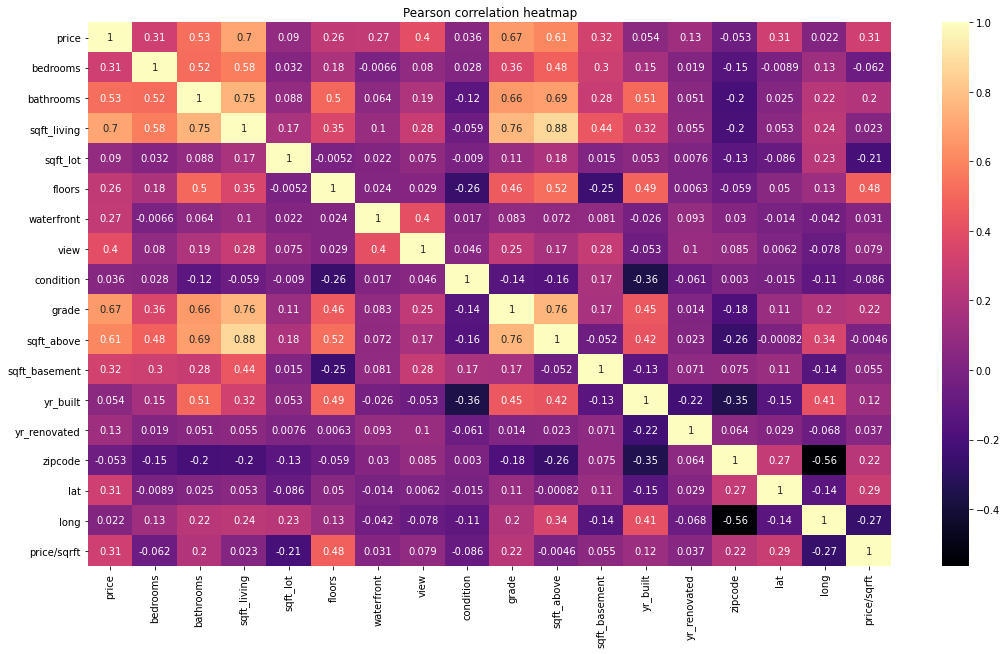

In [15]:
df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title('Pearson correlation heatmap')
plt.show()

# SPLITTING DATA

In [16]:
from sklearn.model_selection import train_test_split

# Algorithm Model

## Feature Selection

In [50]:
df1 = df.drop(columns=['yr_built','yr_renovated','waterfront','floors','sqft_lot','sqft_above','sqft_basement','lat','long'])

X = df1.drop(columns='price')  ### Features 
y = df1['price'] ### Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .80, random_state = 42)

# Machine Learning Modelling

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model_linreg = LinearRegression()

In [20]:
model_linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model_linreg.predict(X_test)

array([ 512044.69203315,  767462.18633531, 1228004.10102095, ...,
        436023.34793266,  343794.69142009,  714908.7820228 ])

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
y_model_Linreg = model_linreg.predict(X_test)

In [53]:
r2_model_Linreg= (r2_score(y_test, y_model_Linreg)).round(2)
MAE_model_linreg = mean_absolute_error(y_test, y_model_Linreg)
MSE_model_linreg= mean_squared_error(y_test, y_model_Linreg)
RMSE_model_linreg = np.sqrt(MSE_model_linreg)

print("Evaluation Matrix Linear regression")
print("MAE Score: ", MAE_model_linreg)
print("MSE Score: ", MSE_model_linreg)
print("RMSE Score: ", RMSE_model_linreg)
print("R2 : ", r2_model_Linreg)

Evaluation Matrix Linear regression
MAE Score:  138070.43880605613
MSE Score:  49991796074.74402
RMSE Score:  223588.45246287656
R2 :  0.64


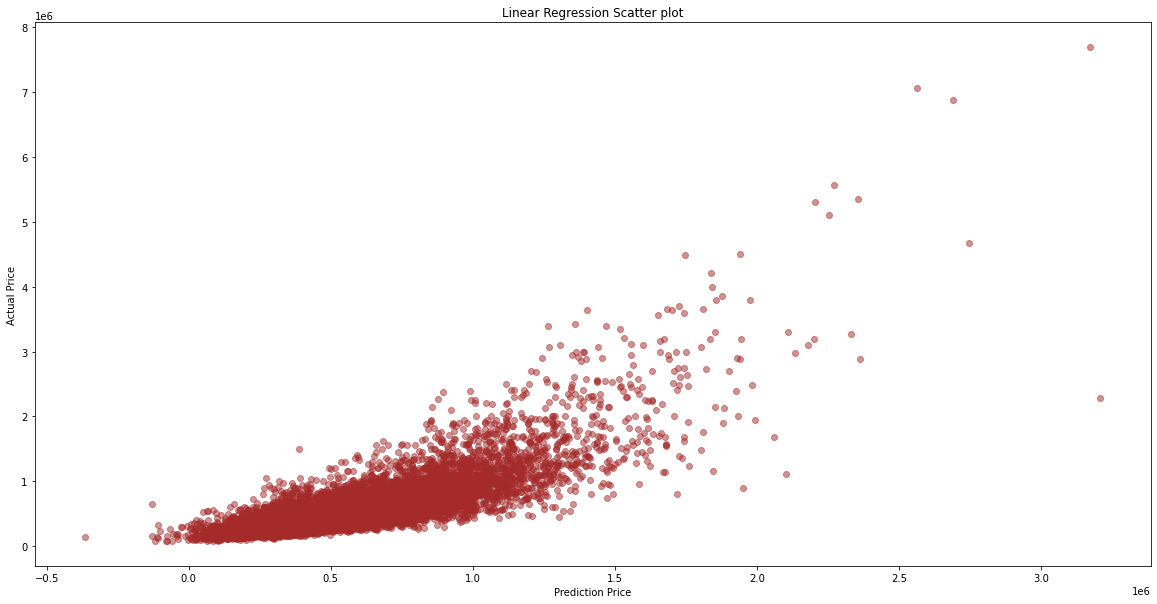

In [56]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_model_Linreg, y_test, color= 'brown', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

## K Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
model_KNN = KNeighborsRegressor()

In [27]:
model_KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [28]:
y_model_KNN = model_KNN.predict(X_test)

In [57]:
r2_model_KNN= (r2_score(y_test, y_model_KNN)).round(2)
MAE_model_KNN = mean_absolute_error(y_test, y_model_KNN)
MSE_model_KNN= mean_squared_error(y_test, y_model_KNN)
RMSE_model_KNN= np.sqrt(MSE_model_KNN)

print("Evaluation Matrix K Nearest Neighbors")
print("MAE Score: ", MAE_model_KNN)
print("MSE Score: ", MSE_model_KNN)
print("RMSE Score: ", RMSE_model_KNN)
print("R2 : ", r2_model_KNN)

Evaluation Matrix K Nearest Neighbors
MAE Score:  133560.24078422302
MSE Score:  54255158434.16145
RMSE Score:  232927.36729324327
R2 :  0.61


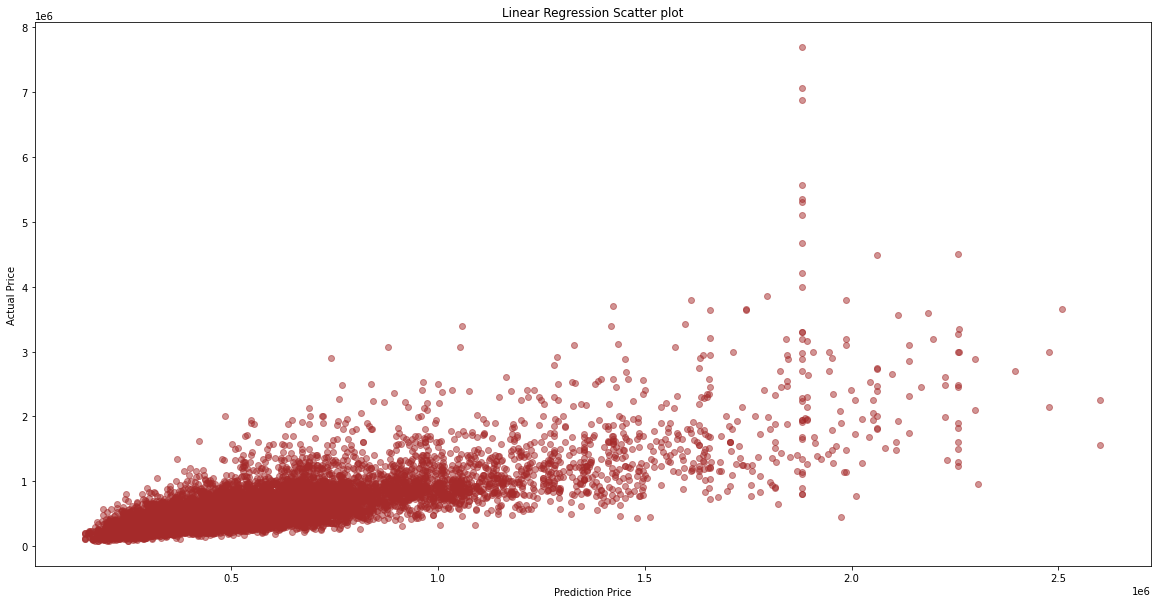

In [58]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_model_KNN, y_test, color= 'brown', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
model_desc_tree=DecisionTreeRegressor()

In [32]:
model_desc_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
y_desc_tree = model_desc_tree.predict(X_test)

In [59]:
r2_model_desc_tree= (r2_score(y_test, y_desc_tree)).round(2)
MAE_model_desc_tree = mean_absolute_error(y_test, y_desc_tree)
MSE_model_desc_tree= mean_squared_error(y_test, y_desc_tree)
RMSE_mode_desc_tree= np.sqrt(MSE_model_desc_tree)

print("Evaluation Matrix Decission Tree")
print("MAE Score: ", MAE_model_desc_tree)
print("MSE Score: ", MSE_model_desc_tree)
print("RMSE Score: ", RMSE_mode_desc_tree)
print("R2 : ", r2_model_desc_tree)

Evaluation Matrix Decission Tree
MAE Score:  129924.26875253022
MSE Score:  56499829545.89191
RMSE Score:  237696.92792691264
R2 :  0.59


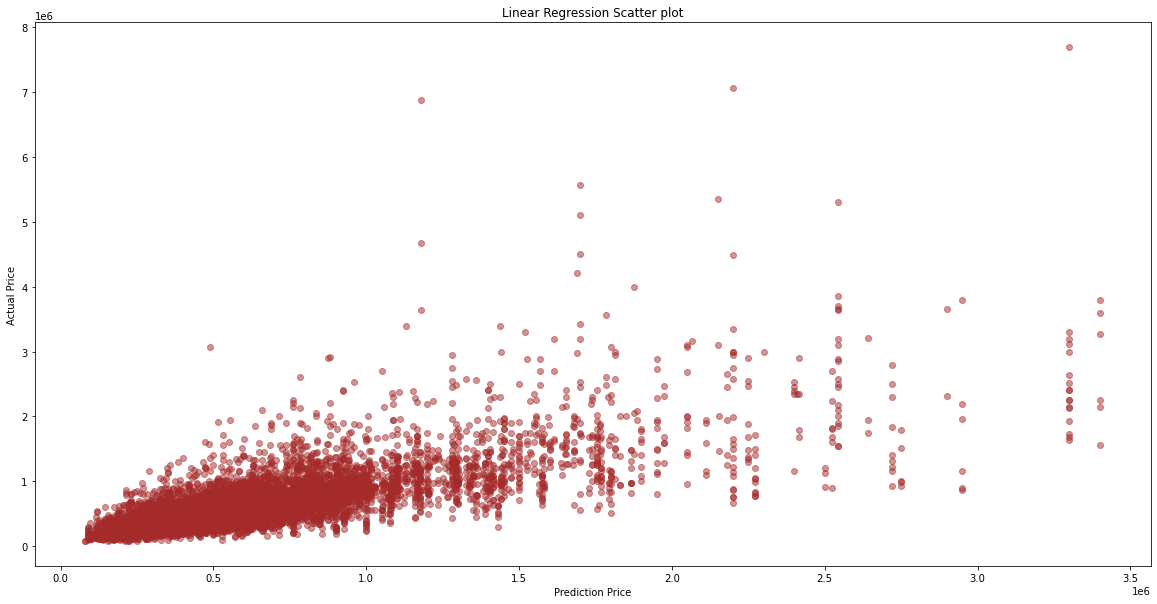

In [60]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_desc_tree, y_test, color= 'brown', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model_RF = RandomForestRegressor()

In [37]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_model_RF = model_RF.predict(X_test)

In [39]:
r2_model_RF= (r2_score(y_test, y_model_RF)).round(2)
MAE_model_RF = mean_absolute_error(y_test, y_model_RF)
MSE_model_RF= mean_squared_error(y_test, y_model_RF)
RMSE_mode_RF= np.sqrt(MSE_model_RF)

print("Evaluation Matrix Random Forest")
print("MAE Score: ", MAE_model_RF)
print("MSE Score: ", MSE_model_RF)
print("RMSE Score: ", RMSE_mode_RF)
print("R2 : ", r2_model_RF)

Evaluation Matrix Random Forest
MAE Score:  96233.59398704527
MSE Score:  32473261296.045135
RMSE Score:  180203.38869190318
R2 :  0.77


In [65]:
data = {
    "Linear Regression" : [MAE_model_linreg, MSE_model_linreg, RMSE_model_linreg, r2_model_Linreg],
    "K Nearest Neighbors" : [MAE_model_KNN, MSE_model_KNN, RMSE_model_KNN, r2_model_KNN],
    "Decission Tree" : [MAE_model_desc_tree, MSE_model_desc_tree, RMSE_mode_desc_tree, r2_model_desc_tree],
    "Random Forest" : [MAE_model_RF, MSE_model_RF, RMSE_mode_RF, r2_model_RF]
}

pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Linear Regression,K Nearest Neighbors,Decission Tree,Random Forest
MAE,1.380704e+05,1.335602e+05,1.299243e+05,9.623359e+04
MSE,4.999180e+10,5.425516e+10,5.649983e+10,3.247326e+10
RMSE,2.235885e+05,2.329274e+05,2.376969e+05,1.802034e+05
R2,6.400000e-01,6.100000e-01,5.900000e-01,7.700000e-01


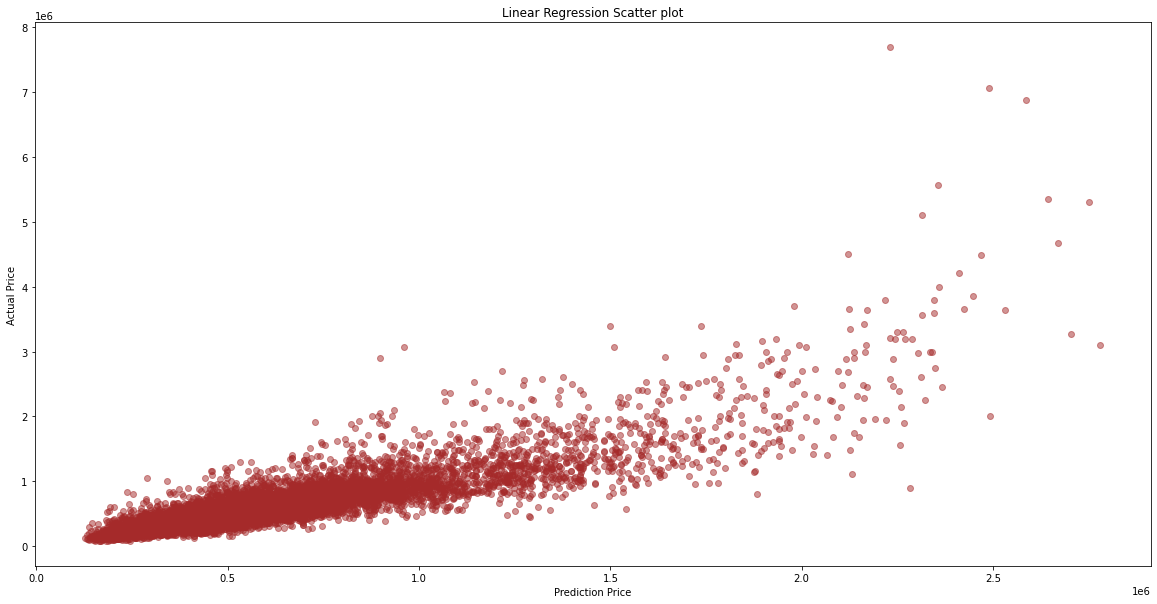

In [66]:
plt.figure(figsize = (20, 10 ))
plt.scatter(y_model_RF, y_test, color= 'brown', alpha = 0.5)
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Scatter plot')

plt.show()

### Linear Regression - Polynomial 


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
apoli = PolynomialFeatures(degree=5, include_bias = False)

In [43]:
apoli.fit_transform(X_train,y_train)

array([[4.00000000e+00, 2.50000000e+00, 2.99000000e+03, ...,
        3.25682472e+15, 2.31598162e+12, 1.64693262e+09],
       [3.00000000e+00, 2.25000000e+00, 1.23000000e+03, ...,
        4.18330922e+17, 1.49686114e+15, 5.35603075e+12],
       [4.00000000e+00, 2.75000000e+00, 4.43000000e+03, ...,
        2.13429218e+13, 2.83946829e+09, 3.77763654e+05],
       ...,
       [3.00000000e+00, 2.50000000e+00, 2.12000000e+03, ...,
        1.67356127e+16, 2.05314999e+13, 2.51883512e+10],
       [1.00000000e+00, 7.50000000e-01, 3.80000000e+02, ...,
        4.19917875e+13, 6.98665413e+09, 1.16244958e+06],
       [4.00000000e+00, 2.50000000e+00, 3.13000000e+03, ...,
        1.39161596e+15, 7.45313400e+11, 3.99170520e+08]])

In [45]:
poli = apoli.fit_transform(df[['price']])

In [46]:
x_poly = df.drop(columns='price')  ### Features 
y_poly = df['price'] ### Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .80, random_state = 42)

In [47]:
model_poly=model_linreg.fit(x_poly,y_poly)

y_linreg_poly=model_poly.predict(x_poly)

In [68]:
r2_linreg_poly= r2_score(y_poly, y_linreg_poly)
MAE_linreg_poly = mean_absolute_error(y_poly, y_linreg_poly)
MSE_linreg_poly= mean_squared_error(y_poly, y_linreg_poly)
RMSE_linreg_poly= np.sqrt(MSE_linreg_poly)

print("Evaluation Matrix Linear Regression- Polynomial")
print("MAE Score: ", MAE_linreg_poly)
print("MSE Score: ", MSE_linreg_poly)
print("RMSE Score: ", RMSE_linreg_poly)
print("R2 : ", r2_linreg_poly)

Evaluation Matrix Linear Regression- Polynomial
MAE Score:  115984.83332138877
MSE Score:  34501133699.89791
RMSE Score:  185744.80800253316
R2 :  0.7440115651763207


## Random Forest - Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [72]:
RF_tuning = RandomForestRegressor()
param_RF = {'max_depth':[1, 15, 20],
            'min_samples_split':[2, 5, 9],
            'min_samples_leaf':[1, 5, 10],
            'max_features':[None,0.2,0.5],
           'n_estimators':[100, 200, 450]}

In [74]:
RF_tuned = GridSearchCV(estimator = RF_tuning, param_grid = param_RF, n_jobs = -1, cv=3, verbose =1)

In [76]:
RF_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [78]:
RF_tuned_train = RF_tuned.best_score_
RF_tuned_train

0.793525124724585

In [79]:
RF_model_tuned = RF_tuned.best_estimator_

In [81]:
y_RF_tuned =  RF_model_tuned.predict(X_test)

In [82]:
r2_tuned_RF = r2_score(y_test, y_RF_tuned)
MAE_RF_tuned = mean_absolute_error(y_test, y_RF_tuned)
MSE_RF_tuned = mean_squared_error(y_test, y_RF_tuned)
RMSE_RF_tuned = np.sqrt(MSE_RF_tuned)

r2_tuned_RF

0.7669959413462114

In [83]:
data = {
    "Linear Regression" : [MAE_model_linreg, MSE_model_linreg, RMSE_model_linreg, r2_model_Linreg],
    "K Nearest Neighbors" : [MAE_model_KNN, MSE_model_KNN, RMSE_model_KNN, r2_model_KNN],
    "Decission Tree" : [MAE_model_desc_tree, MSE_model_desc_tree, RMSE_mode_desc_tree, r2_model_desc_tree],
    "Random Forest" : [MAE_model_RF, MSE_model_RF, RMSE_mode_RF, r2_model_RF],
    "Linear Regression - polynomial" : [MAE_linreg_poly, MSE_linreg_poly, RMSE_linreg_poly, r2_linreg_poly],
    "Random Forest- Tuned":[MAE_RF_tuned,MSE_RF_tuned,RMSE_RF_tuned,r2_tuned_RF]
}

pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Linear Regression,K Nearest Neighbors,Decission Tree,Random Forest,Linear Regression - polynomial,Random Forest- Tuned
MAE,1.380704e+05,1.335602e+05,1.299243e+05,9.623359e+04,1.159848e+05,9.653297e+04
MSE,4.999180e+10,5.425516e+10,5.649983e+10,3.247326e+10,3.450113e+10,3.246934e+10
RMSE,2.235885e+05,2.329274e+05,2.376969e+05,1.802034e+05,1.857448e+05,1.801925e+05
R2,6.400000e-01,6.100000e-01,5.900000e-01,7.700000e-01,7.440116e-01,7.669959e-01


Random Forest Regressor Base Model is commended in this case, because its R2 Score is the highest among the others.